In [2]:
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv('data/cleaned.csv').drop(columns=['Unnamed: 0'])

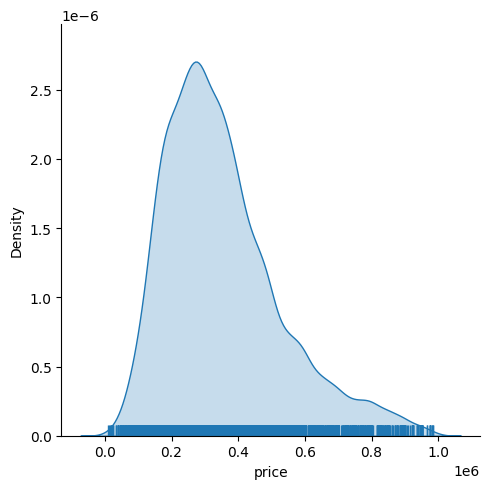

In [4]:
sns.displot(df['price'], rug=True, kind='kde', fill=True)

<Figure size 640x480 with 0 Axes>

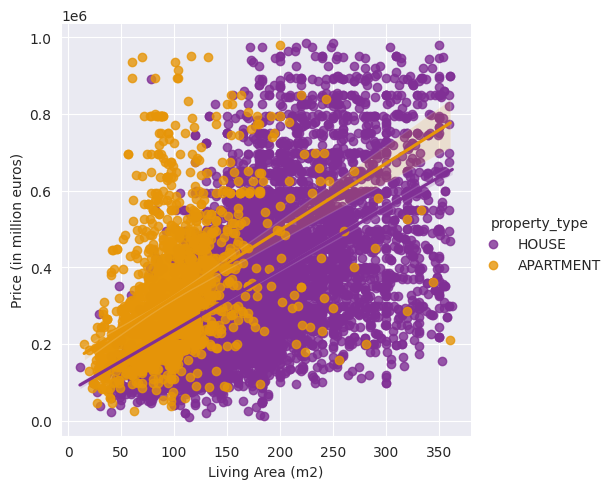

In [5]:
sns.set_style('darkgrid')
sns.despine(left=True)
sns.lmplot(data=df, x='living_area', y='price', hue='property_type', palette='CMRmap').set(xlabel='Living Area (m2)', ylabel='Price (in million euros)')

<Figure size 640x480 with 0 Axes>

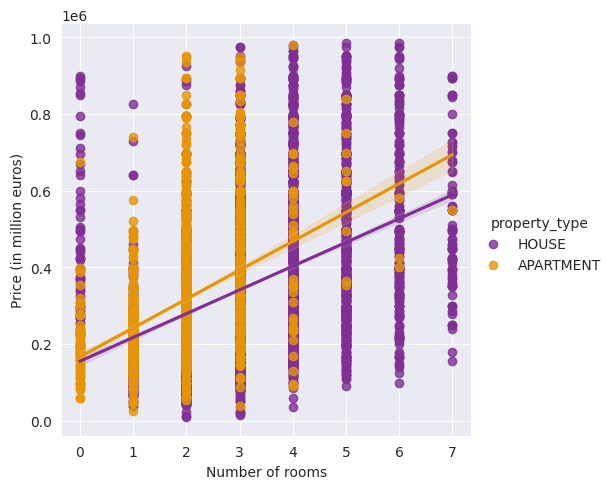

In [6]:
sns.set_style('darkgrid')
sns.despine(left=True)
sns.lmplot(data=df, x='number_rooms', y='price', hue='property_type', palette='CMRmap').set(xlabel='Number of rooms', ylabel='Price (in million euros)')

<Figure size 640x480 with 0 Axes>

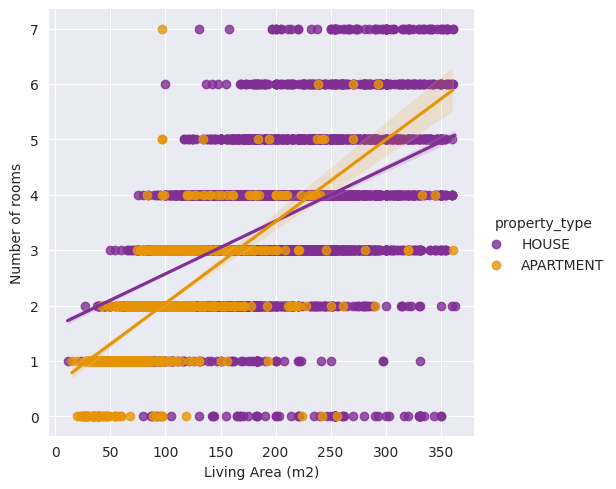

In [7]:
sns.set_style('darkgrid')
sns.despine(left=True)
sns.lmplot(data=df, x='living_area', y='number_rooms', hue='property_type', palette='CMRmap').set(xlabel='Living Area (m2)', ylabel='Number of rooms')

<Figure size 640x480 with 0 Axes>

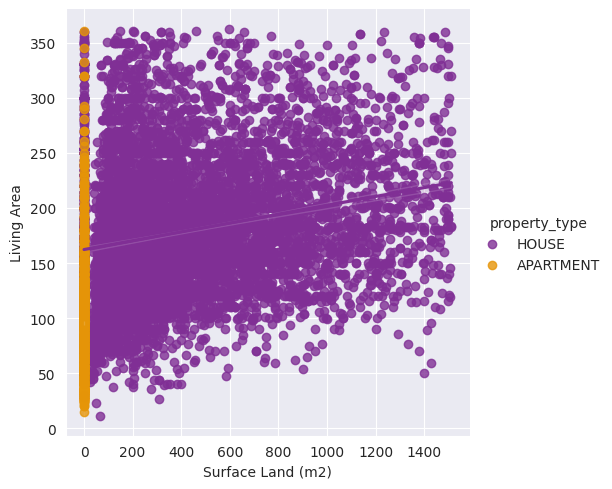

In [8]:
sns.set_style('darkgrid')
sns.despine(left=True)
sns.lmplot(data=df, x='surface_land', y='living_area', hue='property_type', palette='CMRmap').set(xlabel='Surface Land (m2)', ylabel='Living Area')

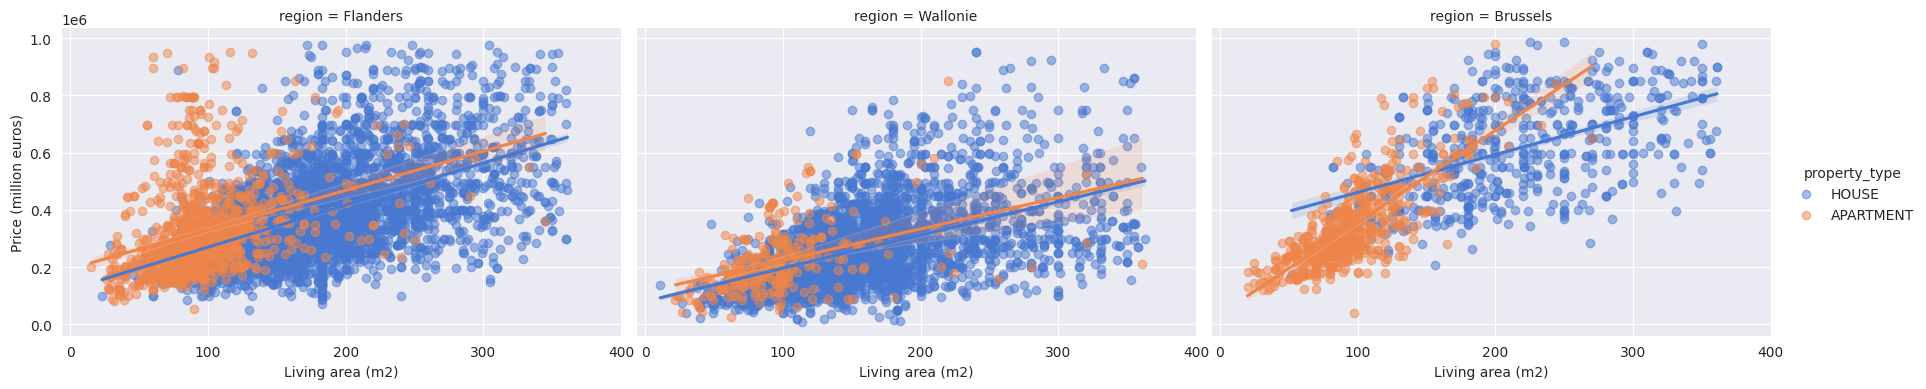

In [9]:

g = sns.FacetGrid(df, col="region", hue="property_type", height=4, aspect=1.5, palette='muted')

g.map(sns.regplot, "living_area", "price", scatter_kws={"alpha": 0.5})
g.set_axis_labels("Living area (m2)", "Price (million euros)")
g.set(xticks=[0, 100, 200, 300, 400])
g.add_legend()

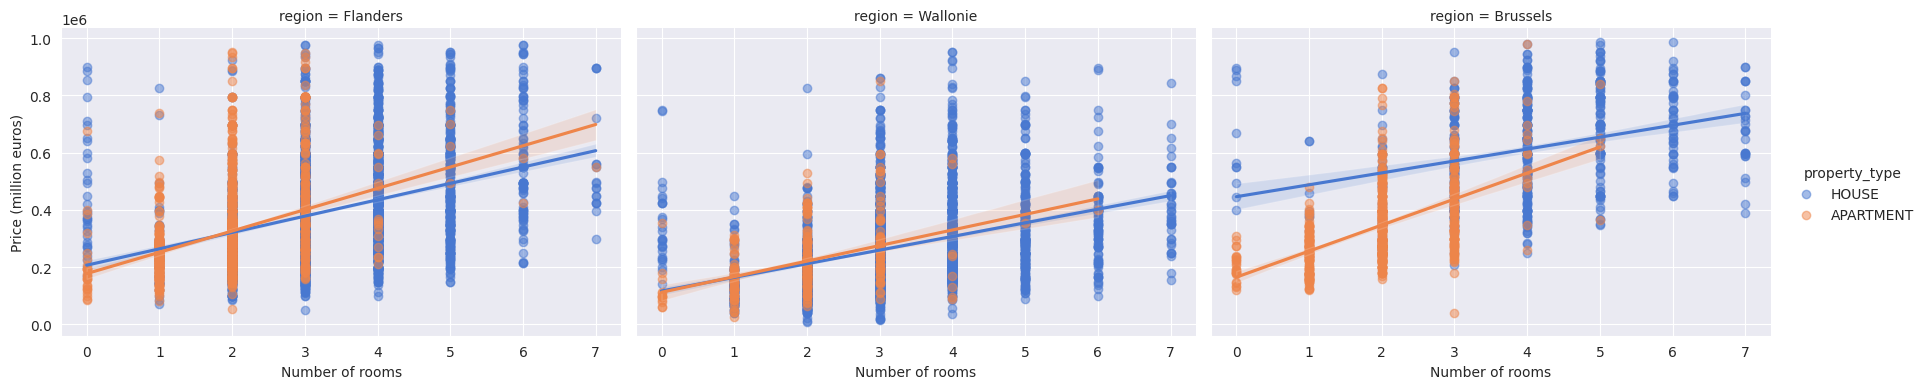

In [10]:
g = sns.FacetGrid(df, col="region", hue="property_type", height=4, aspect=1.5, palette='muted')
g.map(sns.regplot, "number_rooms", "price", scatter_kws={"alpha": 0.5})
g.set_axis_labels("Number of rooms", "Price (million euros)")
g.add_legend()

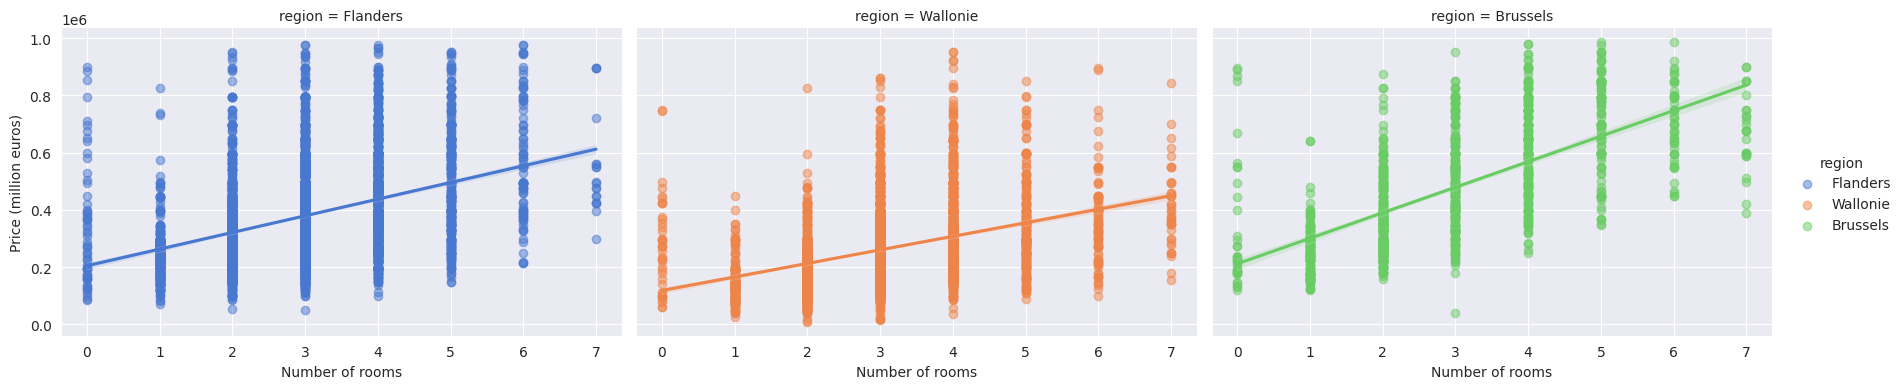

In [11]:
g = sns.FacetGrid(df, col="region", hue="region", height=4, aspect=1.5, palette='muted')
g.map(sns.regplot, "number_rooms", "price", scatter_kws={"alpha": 0.5})
g.set_axis_labels("Number of rooms", "Price (million euros)")
g.add_legend()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          9983 non-null   object 
 1   property_type     9983 non-null   object 
 2   property_subtype  9983 non-null   object 
 3   price             9983 non-null   float64
 4   number_rooms      9983 non-null   float64
 5   living_area       9983 non-null   float64
 6   kitchen           9983 non-null   object 
 7   furnished         9983 non-null   int64  
 8   fireplace         9983 non-null   float64
 9   terrace           9983 non-null   int64  
 10  terrace_area      9983 non-null   float64
 11  garden            9983 non-null   int64  
 12  garden_area       9983 non-null   float64
 13  surface_land      9983 non-null   float64
 14  number_facades    9983 non-null   float64
 15  swimming_pool     9983 non-null   int64  
 16  building_state    9983 non-null   object 


In [15]:
df.head()

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude,region,province
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,0,0.0,0,...,1,0.0,1472.0,4.0,0,GOOD,49.746322,3.073303,Flanders,Limburg
1,Ham,HOUSE,HOUSE,399500.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,461.0,3.0,0,AS_NEW,49.746322,3.073303,Flanders,Limburg
2,Ham,HOUSE,HOUSE,381000.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,343.0,3.0,0,AS_NEW,49.746322,3.073303,Flanders,Limburg
3,Ham,HOUSE,HOUSE,393500.0,3.0,192.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,392.0,3.0,0,AS_NEW,49.746322,3.073303,Flanders,Limburg
4,Ham,HOUSE,HOUSE,315000.0,3.0,197.0,NOT_INSTALLED,0,0.0,0,...,0,0.0,509.0,3.0,0,AS_NEW,49.746322,3.073303,Flanders,Limburg


In [16]:
len(df.columns)

21

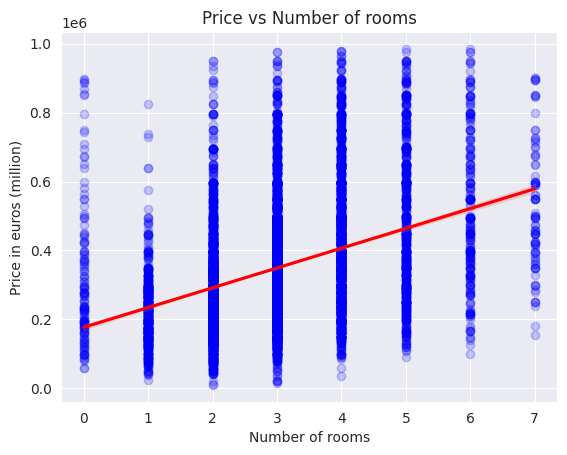

In [17]:
import matplotlib.pyplot as plt

sns.regplot(df, x='number_rooms', y='price', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Price vs Number of rooms')
plt.ylabel('Price in euros (million)')
plt.xlabel('Number of rooms')
sns.set_style('darkgrid')

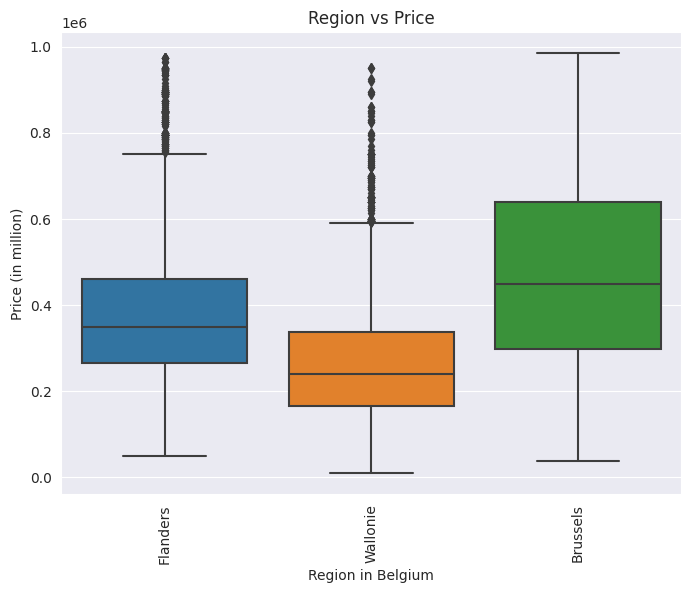

In [18]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'region', y = 'price',  data = df,ax=ax)
plt.title('Region vs Price')
plt.xlabel('Region in Belgium')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)



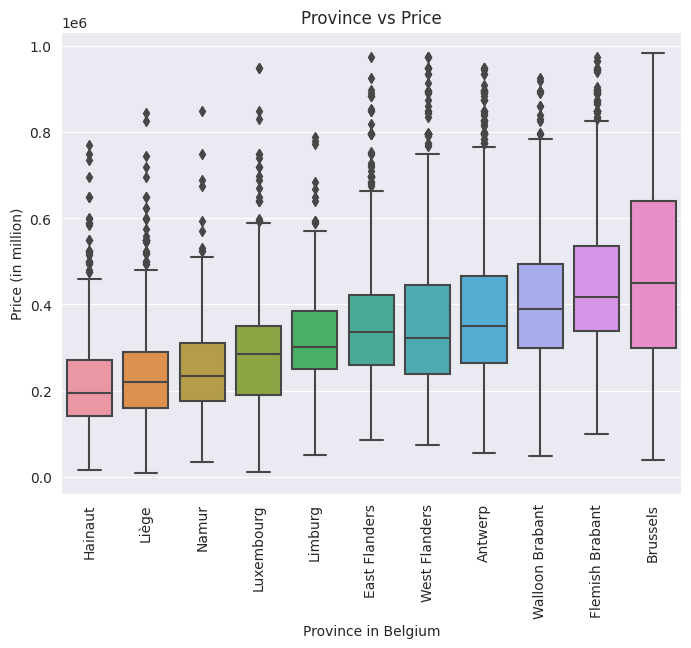

In [19]:
mean_prices = df.groupby('province')['price'].mean().sort_values(ascending=True)
sorted_categories = mean_prices.index.tolist()
df['province'] = pd.Categorical(df['province'], categories=sorted_categories, ordered=True)

fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'province', y = 'price',  data = df,ax=ax)
plt.title('Province vs Price')
plt.xlabel('Province in Belgium')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)



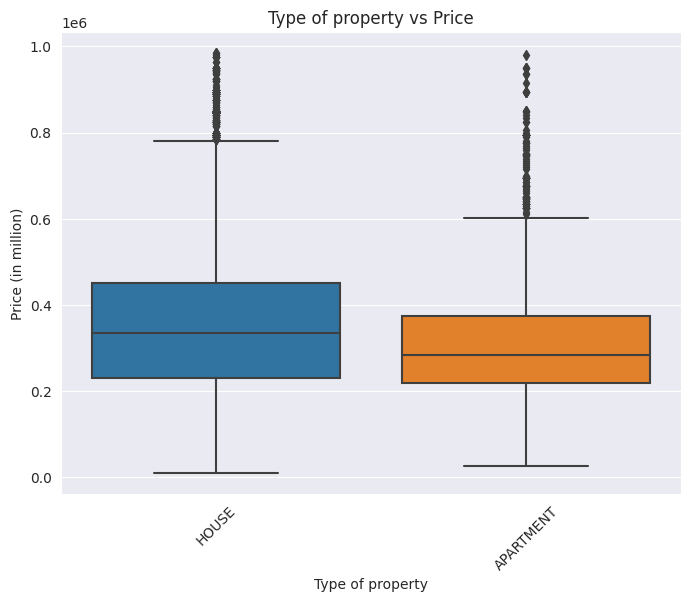

In [20]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'property_type', y = 'price',  data = df,ax=ax)
plt.title('Type of property vs Price')
plt.xlabel('Type of property')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)

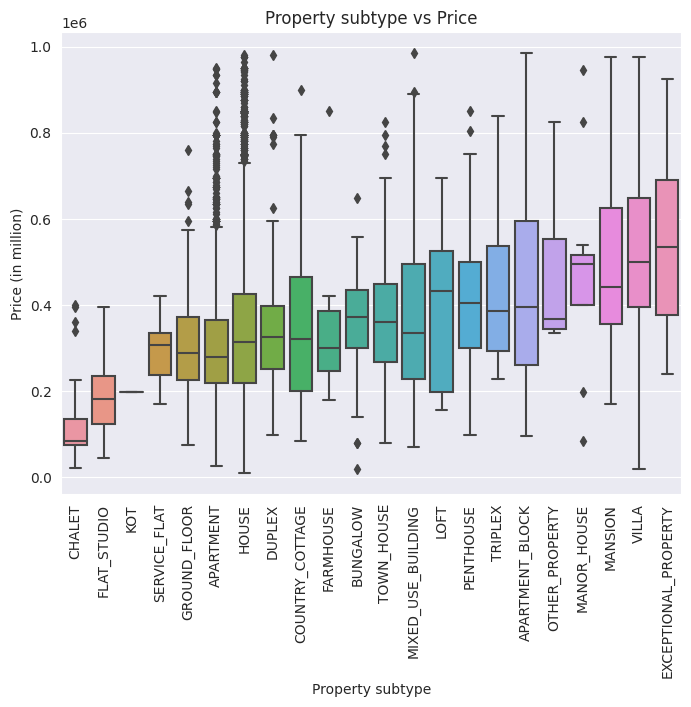

In [21]:
mean_prices = df.groupby('property_subtype')['price'].mean().sort_values(ascending=True)
sorted_categories = mean_prices.index.tolist()
df['property_subtype'] = pd.Categorical(df['property_subtype'], categories=sorted_categories, ordered=True)

fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'property_subtype', y = 'price',  data = df,ax=ax)
plt.title('Property subtype vs Price')
plt.xlabel('Property subtype')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'KitchenQual vs SalePrice')

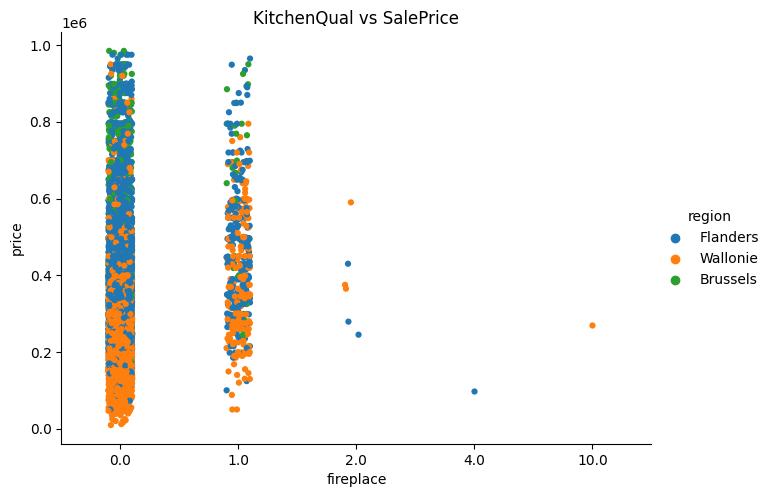

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=df,x='fireplace',y='price',
               size=4.5,aspect=1.35, hue='region')
plt.title('fireplace vs SalePrice - per Region')
